## Importamos las Librerías:

In [58]:
import empiricaldist
import matplotlib.pyplot as plt
import janitor
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import session_info
import warnings
warnings.filterwarnings('ignore')

In [59]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

## Cargamos el DataFrame:

In [121]:
datos = pd.read_csv("~/trabajo_infantil/data/probabilidad/ayuntamientos_electos.csv")
datos

,Año,Nombre_estado,Cargo,ID_Municipio,Municipio,Partido,Nombre_candidato,Sexo,Coalición,Formula
0,2018,AGUASCALIENTES,Diputación,No Aplica,No Aplica,PAN_PRD_MC,MONICA JANETH JIMENEZ RODRIGUEZ,Mujer,Sí,Mayoría relativa
1,2018,AGUASCALIENTES,Diputación,No Aplica,No Aplica,PT_MORENA_ES,JOSE MANUEL GONZALEZ MOTA,Hombre,Sí,Mayoría relativa
2,2018,AGUASCALIENTES,Diputación,No Aplica,No Aplica,PAN_PRD_MC,JORGE SAUCEDO GAYTAN,Hombre,Sí,Mayoría relativa
3,2018,AGUASCALIENTES,Diputación,No Aplica,No Aplica,PAN_PRD_MC,KARINA IVETTE EUDAVE DELGADO,Mujer,Sí,Mayoría relativa
4,2018,AGUASCALIENTES,Diputación,No Aplica,No Aplica,PAN_PRD_MC,SALVADOR PEREZ SANCHEZ,Hombre,Sí,Mayoría relativa
...,...,...,...,...,...,...,...,...,...,...
31922,2023,COAHUILA,Diputación,No Aplica,No Aplica,MORENA,DELIA AURORA HERNÁNDEZ ALVARADO,Mujer,No,Representación Proporcional
31923,2023,COAHUILA,Diputación,No Aplica,No Aplica,MORENA,ROSAURA MONROY BECERRIL,Mujer,No,Representación Proporcional
31924,2023,COAHUILA,Diputación,No Aplica,No Aplica,MORENA,LUIS JAIME PONCE ORTIZ,Hombre,No,Representación Proporcional
31925,2023,COAHUILA,Diputación,No Aplica,No Aplica,MORENA,YUDITH ELIZABETH RODRIGUEZ MARTINEZ,Mujer,No,Representación Proporcional


In [122]:
datos['Cargo'].value_counts()

Cargo
Regiduría                21579
Presidencia Municipal     4944
Sindicatura               3083
Consejal                  1400
Diputación                 909
Gubernatura                 11
Name: count, dtype: int64

## Realizamos la Unión entre los Votos Obtenidos y las Personas Electas:

### Cargamos el Conjunto de Datos:

In [123]:
votos = pd.read_csv('~/trabajo_infantil/data/probabilidad/ayuntamientos_votos.csv')
votos.head()

,Año,ID_estado,Nombre_estado,ID_Municipio,Municipio,Partido,Votos,Votos_validos,Votos_candidato_sin_registro,Votos_nulos,Total_de_votos,Lista_nominal,Coalición
0,2015,3,BAJA CALIFORNIA SUR,1,COMONDU,PAN_PRS,12818,29183,13,987,30170,48403,Sí
1,2015,3,BAJA CALIFORNIA SUR,1,COMONDU,PRI_PVEM,10037,29183,13,987,30170,48403,Sí
2,2015,3,BAJA CALIFORNIA SUR,1,COMONDU,PRD_PT_MC,4975,29183,13,987,30170,48403,Sí
3,2015,3,BAJA CALIFORNIA SUR,1,COMONDU,NUAL,351,29183,13,987,30170,48403,No
4,2015,3,BAJA CALIFORNIA SUR,1,COMONDU,MORENA,412,29183,13,987,30170,48403,No


### Seleccionamos solo los Cargos de Ayuntamiento:

In [124]:
datos = datos[datos['Cargo'] == 'Presidencia Municipal']
datos

,Año,Nombre_estado,Cargo,ID_Municipio,Municipio,Partido,Nombre_candidato,Sexo,Coalición,Formula
48,2018,BAJA CALIFORNIA SUR,Presidencia Municipal,1,COMONDU,MORENA_ES,JOSE WALTER VALENZUELA ACOSTA,Hombre,Sí,Mayoría relativa
59,2018,BAJA CALIFORNIA SUR,Presidencia Municipal,2,MULEGE,NaN,JOSE FELIPE PRADO BAUTISTA,Hombre,No,Mayoría relativa
70,2018,BAJA CALIFORNIA SUR,Presidencia Municipal,3,LA PAZ,MORENA_ES,RUBEN GREGORIO MUÑOZ ALVAREZ,Hombre,Sí,Mayoría relativa
85,2018,BAJA CALIFORNIA SUR,Presidencia Municipal,4,LOS CABOS,MORENA_ES,JESUS ARMIDA CASTRO GUZMAN,Mujer,Sí,Mayoría relativa
98,2018,BAJA CALIFORNIA SUR,Presidencia Municipal,5,LORETO,C_COMUN_PAN_PRD_PRS_PHBCS,ARELY ARCE PERALTA,Mujer,Sí,Mayoría relativa
...,...,...,...,...,...,...,...,...,...,...
31794,2022,DURANGO,Presidencia Municipal,35,TAMAZULA,PVEM_PT_MORENA_RSPD,RICARDO OCHOA BELTRÁN,Hombre,Sí,Mayoría relativa
31805,2022,DURANGO,Presidencia Municipal,36,TEPEHUANES,PAN_PRI_PRD,MARISELA CORRAL LÓPEZ,Mujer,Sí,Mayoría relativa
31814,2022,DURANGO,Presidencia Municipal,37,TLAHUALILO,PVEM_PT_MORENA_RSPD,JUDITH RODRÍGUEZ OLIVARES,Mujer,Sí,Mayoría relativa
31825,2022,DURANGO,Presidencia Municipal,38,TOPIA,PVEM_PT_MORENA_RSPD,MIRNA YUNELI ROBLES VIZCARRA,Mujer,Sí,Mayoría relativa


In [125]:
datos[datos['Municipio'] == 'MULEGE']

,Año,Nombre_estado,Cargo,ID_Municipio,Municipio,Partido,Nombre_candidato,Sexo,Coalición,Formula
59,2018,BAJA CALIFORNIA SUR,Presidencia Municipal,2,MULEGE,NaN,JOSE FELIPE PRADO BAUTISTA,Hombre,No,Mayoría relativa
12806,2021,BAJA CALIFORNIA SUR,Presidencia Municipal,2,MULEGE,C_COMUN_PAN_PRI_PRD_PRS_PHBCS,EDITH AGUILAR VILLAVICENCIO,Mujer,Sí,Mayoría relativa


In [126]:
votos[votos['Municipio'] == 'MULEGE']

,Año,ID_estado,Nombre_estado,ID_Municipio,Municipio,Partido,Votos,Votos_validos,Votos_candidato_sin_registro,Votos_nulos,Total_de_votos,Lista_nominal,Coalición
7,2015,3,BAJA CALIFORNIA SUR,2,MULEGE,PAN_PRS,9048,21417,14,845,22262,37887,Sí
8,2015,3,BAJA CALIFORNIA SUR,2,MULEGE,PRI_PVEM,4210,21417,14,845,22262,37887,Sí
9,2015,3,BAJA CALIFORNIA SUR,2,MULEGE,PRD_PT_MC,939,21417,14,845,22262,37887,Sí
10,2015,3,BAJA CALIFORNIA SUR,2,MULEGE,NUAL,6191,21417,14,845,22262,37887,No
11,2015,3,BAJA CALIFORNIA SUR,2,MULEGE,MORENA,566,21417,14,845,22262,37887,No
12,2015,3,BAJA CALIFORNIA SUR,2,MULEGE,ES,298,21417,14,845,22262,37887,No
13,2015,3,BAJA CALIFORNIA SUR,2,MULEGE,MHTG,151,21417,14,845,22262,37887,No
11174,2018,3,BAJA CALIFORNIA SUR,2,MULEGE,C_COMUN_PAN_PRD_PRS_PHBCS,7923,23773,3,954,24730,41048,Sí
11175,2018,3,BAJA CALIFORNIA SUR,2,MULEGE,PRI,655,23773,3,954,24730,41048,No
11176,2018,3,BAJA CALIFORNIA SUR,2,MULEGE,MC,133,23773,3,954,24730,41048,No


### Conocemos las Columnas de Conjuntos de Datos:

In [127]:
print(datos.columns)
print(votos.columns)

Index(['Año', 'Nombre_estado', 'Cargo', 'ID_Municipio', 'Municipio', 'Partido',
       'Nombre_candidato', 'Sexo', 'Coalición', 'Formula'],
      dtype='object')
Index(['Año', 'ID_estado', 'Nombre_estado', 'ID_Municipio', 'Municipio',
       'Partido', 'Votos', 'Votos_validos', 'Votos_candidato_sin_registro',
       'Votos_nulos', 'Total_de_votos', 'Lista_nominal', 'Coalición'],
      dtype='object')


In [128]:
print(datos.shape)
print(votos.shape)

(4944, 10)
(43278, 13)


## Hacemos el 'merge':

In [130]:
columnas_clave = ['Año', 'Nombre_estado', 'ID_Municipio', 'Municipio', 'Partido']

for col in columnas_clave:
    datos[col] = datos[col].astype(str)
    votos[col] = votos[col].astype(str)

In [131]:
columnas_clave = ['Año', 'Nombre_estado', 'ID_Municipio', 'Municipio', 'Partido']

for col in columnas_clave:
    datos[col] = datos[col].astype(str)
    votos[col] = votos[col].astype(str)


In [132]:
union = pd.merge(
    datos,
    votos,
    on=['Año', 'Nombre_estado', 'ID_Municipio', 'Municipio', 'Partido'],
    how='left'  # Cambia a 'left', 'right' o 'outer' según lo que necesites
)
union

,Año,Nombre_estado,Cargo,ID_Municipio,Municipio,Partido,Nombre_candidato,Sexo,Coalición_x,Formula,ID_estado,Votos,Votos_validos,Votos_candidato_sin_registro,Votos_nulos,Total_de_votos,Lista_nominal,Coalición_y
0,2018,BAJA CALIFORNIA SUR,Presidencia Municipal,1,COMONDU,MORENA_ES,JOSE WALTER VALENZUELA ACOSTA,Hombre,Sí,Mayoría relativa,3.0,464.0,31435.0,3.0,1333.0,32771.0,53666.0,Sí
1,2018,BAJA CALIFORNIA SUR,Presidencia Municipal,2,MULEGE,nan,JOSE FELIPE PRADO BAUTISTA,Hombre,No,Mayoría relativa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018,BAJA CALIFORNIA SUR,Presidencia Municipal,3,LA PAZ,MORENA_ES,RUBEN GREGORIO MUÑOZ ALVAREZ,Hombre,Sí,Mayoría relativa,3.0,1392.0,118302.0,146.0,4746.0,123194.0,203030.0,Sí
3,2018,BAJA CALIFORNIA SUR,Presidencia Municipal,4,LOS CABOS,MORENA_ES,JESUS ARMIDA CASTRO GUZMAN,Mujer,Sí,Mayoría relativa,3.0,661.0,102638.0,64.0,3873.0,106575.0,206467.0,Sí
4,2018,BAJA CALIFORNIA SUR,Presidencia Municipal,5,LORETO,C_COMUN_PAN_PRD_PRS_PHBCS,ARELY ARCE PERALTA,Mujer,Sí,Mayoría relativa,3.0,3396.0,7893.0,1.0,169.0,8063.0,11935.0,Sí
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4963,2022,DURANGO,Presidencia Municipal,35,TAMAZULA,PVEM_PT_MORENA_RSPD,RICARDO OCHOA BELTRÁN,Hombre,Sí,Mayoría relativa,10.0,8.0,12357.0,1.0,304.0,12662.0,17065.0,Sí
4964,2022,DURANGO,Presidencia Municipal,36,TEPEHUANES,PAN_PRI_PRD,MARISELA CORRAL LÓPEZ,Mujer,Sí,Mayoría relativa,10.0,41.0,5511.0,4.0,135.0,5650.0,10459.0,Sí
4965,2022,DURANGO,Presidencia Municipal,37,TLAHUALILO,PVEM_PT_MORENA_RSPD,JUDITH RODRÍGUEZ OLIVARES,Mujer,Sí,Mayoría relativa,10.0,9.0,9192.0,377.0,211.0,9780.0,15337.0,Sí
4966,2022,DURANGO,Presidencia Municipal,38,TOPIA,PVEM_PT_MORENA_RSPD,MIRNA YUNELI ROBLES VIZCARRA,Mujer,Sí,Mayoría relativa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Creamos una Copia de Unión, para Usarla Después:

In [71]:
registros = union
registros

,Año,Nombre_estado,Cargo,ID_Municipio,Municipio,Partido,Nombre_candidato,Sexo,Coalición_x,Formula,ID_estado,Votos,Votos_validos,Votos_candidato_sin_registro,Votos_nulos,Total_de_votos,Lista_nominal,Coalición_y
0,2018,BAJA CALIFORNIA SUR,Presidencia Municipal,1,COMONDU,MORENA_ES,JOSE WALTER VALENZUELA ACOSTA,Hombre,Sí,Mayoría relativa,3.0,464.0,31435.0,3.0,1333.0,32771.0,53666.0,Sí
1,2018,BAJA CALIFORNIA SUR,Presidencia Municipal,2,MULEGE,nan,JOSE FELIPE PRADO BAUTISTA,Hombre,No,Mayoría relativa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018,BAJA CALIFORNIA SUR,Presidencia Municipal,3,LA PAZ,MORENA_ES,RUBEN GREGORIO MUÑOZ ALVAREZ,Hombre,Sí,Mayoría relativa,3.0,1392.0,118302.0,146.0,4746.0,123194.0,203030.0,Sí
3,2018,BAJA CALIFORNIA SUR,Presidencia Municipal,4,LOS CABOS,MORENA_ES,JESUS ARMIDA CASTRO GUZMAN,Mujer,Sí,Mayoría relativa,3.0,661.0,102638.0,64.0,3873.0,106575.0,206467.0,Sí
4,2018,BAJA CALIFORNIA SUR,Presidencia Municipal,5,LORETO,C_COMUN_PAN_PRD_PRS_PHBCS,ARELY ARCE PERALTA,Mujer,Sí,Mayoría relativa,3.0,3396.0,7893.0,1.0,169.0,8063.0,11935.0,Sí
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4963,2022,DURANGO,Presidencia Municipal,35,TAMAZULA,PVEM_PT_MORENA_RSPD,RICARDO OCHOA BELTRÁN,Hombre,Sí,Mayoría relativa,10.0,8.0,12357.0,1.0,304.0,12662.0,17065.0,Sí
4964,2022,DURANGO,Presidencia Municipal,36,TEPEHUANES,PAN_PRI_PRD,MARISELA CORRAL LÓPEZ,Mujer,Sí,Mayoría relativa,10.0,41.0,5511.0,4.0,135.0,5650.0,10459.0,Sí
4965,2022,DURANGO,Presidencia Municipal,37,TLAHUALILO,PVEM_PT_MORENA_RSPD,JUDITH RODRÍGUEZ OLIVARES,Mujer,Sí,Mayoría relativa,10.0,9.0,9192.0,377.0,211.0,9780.0,15337.0,Sí
4966,2022,DURANGO,Presidencia Municipal,38,TOPIA,PVEM_PT_MORENA_RSPD,MIRNA YUNELI ROBLES VIZCARRA,Mujer,Sí,Mayoría relativa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
union['Votos'].value_counts()

Votos
60.0       12
6252.0     12
14.0       12
25699.0    11
10717.0    11
           ..
6735.0      1
7707.0      1
6485.0      1
3835.0      1
6832.0      1
Name: count, Length: 1462, dtype: int64

## Imputar los Valores Nan:

In [73]:
# Revisamos las columnas de votos primero
print(votos.columns)

# 1️⃣ Seleccionar las columnas necesarias del dataframe de votos ganador
columnas_a_rellenar = ['Votos', 'Votos_validos', 
                       'Votos_candidato_sin_registro', 'Votos_nulos', 
                       'Total_de_votos', 'Lista_nominal']

# Nos aseguramos que estas columnas están
columnas_ganadores = ['Año', 'Nombre_estado', 'ID_Municipio', 'Municipio', 'Partido'] + columnas_a_rellenar

ganadores = (
    votos[columnas_ganadores]
    .sort_values(['Año', 'Nombre_estado', 'ID_Municipio', 'Municipio', 'Votos'], ascending=[True, True, True, True, False])
    .drop_duplicates(subset=['Año', 'Nombre_estado', 'ID_Municipio', 'Municipio'])
    .rename(columns={'Partido': 'Partido_ganador'})
)

print(ganadores.columns)

# 2️⃣ Merge controlado
union = pd.merge(
    union, 
    ganadores, 
    on=['Año', 'Nombre_estado', 'ID_Municipio', 'Municipio'],
    how='left', 
    suffixes=('', '_ganador')
)

# 3️⃣ Rellenamos solo los NaN usando los valores de ganadores
for col in columnas_a_rellenar:
    union[col] = union[col].fillna(union[f"{col}"])

# Rellenamos Partido
union['Partido'] = union['Partido'].fillna(union['Partido_ganador'])

Index(['Año', 'ID_estado', 'Nombre_estado', 'ID_Municipio', 'Municipio',
       'Partido', 'Votos', 'Votos_validos', 'Votos_candidato_sin_registro',
       'Votos_nulos', 'Total_de_votos', 'Lista_nominal', 'Coalición'],
      dtype='object')


Index(['Año', 'Nombre_estado', 'ID_Municipio', 'Municipio', 'Partido_ganador',
       'Votos', 'Votos_validos', 'Votos_candidato_sin_registro', 'Votos_nulos',
       'Total_de_votos', 'Lista_nominal'],
      dtype='object')


In [74]:
union

,Año,Nombre_estado,Cargo,ID_Municipio,Municipio,Partido,Nombre_candidato,Sexo,Coalición_x,Formula,...,Total_de_votos,Lista_nominal,Coalición_y,Partido_ganador,Votos_ganador,Votos_validos_ganador,Votos_candidato_sin_registro_ganador,Votos_nulos_ganador,Total_de_votos_ganador,Lista_nominal_ganador
0,2018,BAJA CALIFORNIA SUR,Presidencia Municipal,1,COMONDU,MORENA_ES,JOSE WALTER VALENZUELA ACOSTA,Hombre,Sí,Mayoría relativa,...,32771.0,53666.0,Sí,MORENA,9624.0,31435.0,3.0,1333.0,32771.0,53666.0
1,2018,BAJA CALIFORNIA SUR,Presidencia Municipal,2,MULEGE,nan,JOSE FELIPE PRADO BAUTISTA,Hombre,No,Mayoría relativa,...,NaN,NaN,NaN,C_COMUN_PAN_PRD_PRS_PHBCS,7923.0,23773.0,3.0,954.0,24730.0,41048.0
2,2018,BAJA CALIFORNIA SUR,Presidencia Municipal,3,LA PAZ,MORENA_ES,RUBEN GREGORIO MUÑOZ ALVAREZ,Hombre,Sí,Mayoría relativa,...,123194.0,203030.0,Sí,MORENA,45241.0,118302.0,146.0,4746.0,123194.0,203030.0
3,2018,BAJA CALIFORNIA SUR,Presidencia Municipal,4,LOS CABOS,MORENA_ES,JESUS ARMIDA CASTRO GUZMAN,Mujer,Sí,Mayoría relativa,...,106575.0,206467.0,Sí,MORENA,32484.0,102638.0,64.0,3873.0,106575.0,206467.0
4,2018,BAJA CALIFORNIA SUR,Presidencia Municipal,5,LORETO,C_COMUN_PAN_PRD_PRS_PHBCS,ARELY ARCE PERALTA,Mujer,Sí,Mayoría relativa,...,8063.0,11935.0,Sí,C_COMUN_PAN_PRD_PRS_PHBCS,3396.0,7893.0,1.0,169.0,8063.0,11935.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4963,2022,DURANGO,Presidencia Municipal,35,TAMAZULA,PVEM_PT_MORENA_RSPD,RICARDO OCHOA BELTRÁN,Hombre,Sí,Mayoría relativa,...,12662.0,17065.0,Sí,MORENA,5992.0,12357.0,1.0,304.0,12662.0,17065.0
4964,2022,DURANGO,Presidencia Municipal,36,TEPEHUANES,PAN_PRI_PRD,MARISELA CORRAL LÓPEZ,Mujer,Sí,Mayoría relativa,...,5650.0,10459.0,Sí,PRI,3154.0,5511.0,4.0,135.0,5650.0,10459.0
4965,2022,DURANGO,Presidencia Municipal,37,TLAHUALILO,PVEM_PT_MORENA_RSPD,JUDITH RODRÍGUEZ OLIVARES,Mujer,Sí,Mayoría relativa,...,9780.0,15337.0,Sí,MORENA,3901.0,9192.0,377.0,211.0,9780.0,15337.0
4966,2022,DURANGO,Presidencia Municipal,38,TOPIA,PVEM_PT_MORENA_RSPD,MIRNA YUNELI ROBLES VIZCARRA,Mujer,Sí,Mayoría relativa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
union.columns

Index(['Año', 'Nombre_estado', 'Cargo', 'ID_Municipio', 'Municipio', 'Partido',
       'Nombre_candidato', 'Sexo', 'Coalición_x', 'Formula', 'ID_estado',
       'Votos', 'Votos_validos', 'Votos_candidato_sin_registro', 'Votos_nulos',
       'Total_de_votos', 'Lista_nominal', 'Coalición_y', 'Partido_ganador',
       'Votos_ganador', 'Votos_validos_ganador',
       'Votos_candidato_sin_registro_ganador', 'Votos_nulos_ganador',
       'Total_de_votos_ganador', 'Lista_nominal_ganador'],
      dtype='object')

## Generamos el Conjunto de Datos para la Nueva Unión, con Menor Sesgo:

### Transormamos los datos:

In [76]:
presidencias = votos
presidencias

,Año,ID_estado,Nombre_estado,ID_Municipio,Municipio,Partido,Votos,Votos_validos,Votos_candidato_sin_registro,Votos_nulos,Total_de_votos,Lista_nominal,Coalición
0,2015,3,BAJA CALIFORNIA SUR,1,COMONDU,PAN_PRS,12818,29183,13,987,30170,48403,Sí
1,2015,3,BAJA CALIFORNIA SUR,1,COMONDU,PRI_PVEM,10037,29183,13,987,30170,48403,Sí
2,2015,3,BAJA CALIFORNIA SUR,1,COMONDU,PRD_PT_MC,4975,29183,13,987,30170,48403,Sí
3,2015,3,BAJA CALIFORNIA SUR,1,COMONDU,NUAL,351,29183,13,987,30170,48403,No
4,2015,3,BAJA CALIFORNIA SUR,1,COMONDU,MORENA,412,29183,13,987,30170,48403,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43273,2022,10,DURANGO,39,VICENTE GUERRERO,PVEM_MORENA,16,9836,165,330,10331,18209,Sí
43274,2022,10,DURANGO,39,VICENTE GUERRERO,PT_MORENA_RSPD,34,9836,165,330,10331,18209,Sí
43275,2022,10,DURANGO,39,VICENTE GUERRERO,PT_MORENA,121,9836,165,330,10331,18209,Sí
43276,2022,10,DURANGO,39,VICENTE GUERRERO,PT_RSPD,11,9836,165,330,10331,18209,Sí


In [77]:
# Función para sumar votos por municipio y actualizar los registros
def sumar_votos_por_municipio(df):
    # Crear una copia para no modificar el DataFrame original
    df = df.copy()

    # Agrupamos por las variables clave que definen un municipio
    grupos = df.groupby(['Año', 'ID_estado', 'Nombre_estado', 'ID_Municipio', 'Municipio'])

    # Crear una lista para guardar los nuevos registros procesados
    resultados = []

    for _, grupo in grupos:
        # Procesamos cada municipio de manera independiente
        partidos_compuestos = grupo[grupo['Partido'].str.contains("_", na=False)]

        # Actualizar votos de los partidos compuestos
        for _, row in partidos_compuestos.iterrows():
            componentes = row["Partido"].split("_")
            # Calcular la suma de votos de los componentes
            votos_componentes = grupo[grupo["Partido"].isin(componentes)]["Votos"].sum()
            # Sumar los votos al partido compuesto
            grupo.loc[grupo["Partido"] == row["Partido"], "Votos"] += votos_componentes

        # Guardar el grupo procesado
        resultados.append(grupo)

    # Combinar todos los grupos procesados en un solo DataFrame
    df_actualizado = pd.concat(resultados, ignore_index=True)
    return df_actualizado

# Aplicar la función al DataFrame "presidencia"
presidencia_actualizada = sumar_votos_por_municipio(presidencias)

# Si quieres guardar el resultado
# presidencia_actualizada.to_csv("presidencia_actualizada.csv", index=False)

# Mostrar un ejemplo de los datos actualizados
print(presidencia_actualizada.head())

    Año  ID_estado        Nombre_estado ID_Municipio Municipio    Partido  \
0  2015          3  BAJA CALIFORNIA SUR            1   COMONDU    PAN_PRS   
1  2015          3  BAJA CALIFORNIA SUR            1   COMONDU   PRI_PVEM   
2  2015          3  BAJA CALIFORNIA SUR            1   COMONDU  PRD_PT_MC   
3  2015          3  BAJA CALIFORNIA SUR            1   COMONDU       NUAL   
4  2015          3  BAJA CALIFORNIA SUR            1   COMONDU     MORENA   

   Votos  Votos_validos  Votos_candidato_sin_registro  Votos_nulos  \
0  12818          29183                            13          987   
1  10037          29183                            13          987   
2   4975          29183                            13          987   
3    351          29183                            13          987   
4    412          29183                            13          987   

   Total_de_votos  Lista_nominal Coalición  
0           30170          48403        Sí  
1           30170         

## Conocemos las Columnas del Nuevo Conjunto de Datos:

In [78]:
presidencia_actualizada.columns

Index(['Año', 'ID_estado', 'Nombre_estado', 'ID_Municipio', 'Municipio',
       'Partido', 'Votos', 'Votos_validos', 'Votos_candidato_sin_registro',
       'Votos_nulos', 'Total_de_votos', 'Lista_nominal', 'Coalición'],
      dtype='object')

## Transformamos los Valores del Nuevo Conjunto de Datos:

In [79]:
presidencia_actualizada['Año'] = presidencia_actualizada['Año'].astype(int)
presidencia_actualizada['ID_Municipio'] = presidencia_actualizada['ID_Municipio'].astype(int)


datos['Año'] = datos['Año'].astype(int)
datos['ID_Municipio'] = datos['ID_Municipio'].astype(int)

## Conocemos los Tipos de Variables por Conjunto de Datos:

In [80]:
print(datos.dtypes)
print(presidencia_actualizada.dtypes)

Año                  int64
Nombre_estado       object
Cargo               object
ID_Municipio         int64
Municipio           object
Partido             object
Nombre_candidato    object
Sexo                object
Coalición           object
Formula             object
dtype: object
Año                              int64
ID_estado                        int64
Nombre_estado                   object
ID_Municipio                     int64
Municipio                       object
Partido                         object
Votos                            int64
Votos_validos                    int64
Votos_candidato_sin_registro     int64
Votos_nulos                      int64
Total_de_votos                   int64
Lista_nominal                    int64
Coalición                       object
dtype: object


### Efecutuamos la Unión Preliminar:

In [81]:
union_1 = pd.merge(
    datos,
    presidencia_actualizada,
    on=['Año', 'Nombre_estado', 'ID_Municipio', 'Municipio', 'Partido'],
    how='left'  # Cambia a 'left', 'right' o 'outer' según lo que necesites
)
union_1

,Año,Nombre_estado,Cargo,ID_Municipio,Municipio,Partido,Nombre_candidato,Sexo,Coalición_x,Formula,ID_estado,Votos,Votos_validos,Votos_candidato_sin_registro,Votos_nulos,Total_de_votos,Lista_nominal,Coalición_y
0,2018,BAJA CALIFORNIA SUR,Presidencia Municipal,1,COMONDU,MORENA_ES,JOSE WALTER VALENZUELA ACOSTA,Hombre,Sí,Mayoría relativa,3.0,10721.0,31435.0,3.0,1333.0,32771.0,53666.0,Sí
1,2018,BAJA CALIFORNIA SUR,Presidencia Municipal,2,MULEGE,nan,JOSE FELIPE PRADO BAUTISTA,Hombre,No,Mayoría relativa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018,BAJA CALIFORNIA SUR,Presidencia Municipal,3,LA PAZ,MORENA_ES,RUBEN GREGORIO MUÑOZ ALVAREZ,Hombre,Sí,Mayoría relativa,3.0,48934.0,118302.0,146.0,4746.0,123194.0,203030.0,Sí
3,2018,BAJA CALIFORNIA SUR,Presidencia Municipal,4,LOS CABOS,MORENA_ES,JESUS ARMIDA CASTRO GUZMAN,Mujer,Sí,Mayoría relativa,3.0,34292.0,102638.0,64.0,3873.0,106575.0,206467.0,Sí
4,2018,BAJA CALIFORNIA SUR,Presidencia Municipal,5,LORETO,C_COMUN_PAN_PRD_PRS_PHBCS,ARELY ARCE PERALTA,Mujer,Sí,Mayoría relativa,3.0,3396.0,7893.0,1.0,169.0,8063.0,11935.0,Sí
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4963,2022,DURANGO,Presidencia Municipal,35,TAMAZULA,PVEM_PT_MORENA_RSPD,RICARDO OCHOA BELTRÁN,Hombre,Sí,Mayoría relativa,10.0,6386.0,12357.0,1.0,304.0,12662.0,17065.0,Sí
4964,2022,DURANGO,Presidencia Municipal,36,TEPEHUANES,PAN_PRI_PRD,MARISELA CORRAL LÓPEZ,Mujer,Sí,Mayoría relativa,10.0,3599.0,5511.0,4.0,135.0,5650.0,10459.0,Sí
4965,2022,DURANGO,Presidencia Municipal,37,TLAHUALILO,PVEM_PT_MORENA_RSPD,JUDITH RODRÍGUEZ OLIVARES,Mujer,Sí,Mayoría relativa,10.0,4158.0,9192.0,377.0,211.0,9780.0,15337.0,Sí
4966,2022,DURANGO,Presidencia Municipal,38,TOPIA,PVEM_PT_MORENA_RSPD,MIRNA YUNELI ROBLES VIZCARRA,Mujer,Sí,Mayoría relativa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Realizamos la Unión Final:

In [82]:
# Revisamos las columnas de votos primero
print(presidencia_actualizada.columns)

# 1️⃣ Seleccionar las columnas necesarias del dataframe de votos ganador
columnas_a_rellenar = ['Votos', 'Votos_validos', 
                       'Votos_candidato_sin_registro', 'Votos_nulos', 
                       'Total_de_votos', 'Lista_nominal']

# Nos aseguramos que estas columnas están
columnas_ganadores = ['Año', 'Nombre_estado', 'ID_Municipio', 'Municipio', 'Partido'] + columnas_a_rellenar

ganadores = (
    presidencia_actualizada[columnas_ganadores]
    .sort_values(['Año', 'Nombre_estado', 'ID_Municipio', 'Municipio', 'Votos'], ascending=[True, True, True, True, False])
    .drop_duplicates(subset=['Año', 'Nombre_estado', 'ID_Municipio', 'Municipio'])
    .rename(columns={'Partido': 'Partido_ganador'})
)

print(ganadores.columns)

# 2️⃣ Merge controlado
union_1 = pd.merge(
    union_1, 
    ganadores, 
    on=['Año', 'Nombre_estado', 'ID_Municipio', 'Municipio'],
    how='left', 
    suffixes=('', '_ganador')
)

# 3️⃣ Rellenamos solo los NaN usando los valores de ganadores
for col in columnas_a_rellenar:
    union_1[col] = union_1[col].fillna(union_1[f"{col}"])

# Rellenamos Partido
union_1['Partido'] = union_1['Partido'].fillna(union_1['Partido_ganador'])


Index(['Año', 'ID_estado', 'Nombre_estado', 'ID_Municipio', 'Municipio',
       'Partido', 'Votos', 'Votos_validos', 'Votos_candidato_sin_registro',
       'Votos_nulos', 'Total_de_votos', 'Lista_nominal', 'Coalición'],
      dtype='object')
Index(['Año', 'Nombre_estado', 'ID_Municipio', 'Municipio', 'Partido_ganador',
       'Votos', 'Votos_validos', 'Votos_candidato_sin_registro', 'Votos_nulos',
       'Total_de_votos', 'Lista_nominal'],
      dtype='object')


In [83]:
union_1.columns

Index(['Año', 'Nombre_estado', 'Cargo', 'ID_Municipio', 'Municipio', 'Partido',
       'Nombre_candidato', 'Sexo', 'Coalición_x', 'Formula', 'ID_estado',
       'Votos', 'Votos_validos', 'Votos_candidato_sin_registro', 'Votos_nulos',
       'Total_de_votos', 'Lista_nominal', 'Coalición_y', 'Partido_ganador',
       'Votos_ganador', 'Votos_validos_ganador',
       'Votos_candidato_sin_registro_ganador', 'Votos_nulos_ganador',
       'Total_de_votos_ganador', 'Lista_nominal_ganador'],
      dtype='object')

In [84]:
union_1

,Año,Nombre_estado,Cargo,ID_Municipio,Municipio,Partido,Nombre_candidato,Sexo,Coalición_x,Formula,...,Total_de_votos,Lista_nominal,Coalición_y,Partido_ganador,Votos_ganador,Votos_validos_ganador,Votos_candidato_sin_registro_ganador,Votos_nulos_ganador,Total_de_votos_ganador,Lista_nominal_ganador
0,2018,BAJA CALIFORNIA SUR,Presidencia Municipal,1,COMONDU,MORENA_ES,JOSE WALTER VALENZUELA ACOSTA,Hombre,Sí,Mayoría relativa,...,32771.0,53666.0,Sí,MORENA_ES,10721.0,31435.0,3.0,1333.0,32771.0,53666.0
1,2018,BAJA CALIFORNIA SUR,Presidencia Municipal,2,MULEGE,nan,JOSE FELIPE PRADO BAUTISTA,Hombre,No,Mayoría relativa,...,NaN,NaN,NaN,C_COMUN_PAN_PRD_PRS_PHBCS,7923.0,23773.0,3.0,954.0,24730.0,41048.0
2,2018,BAJA CALIFORNIA SUR,Presidencia Municipal,3,LA PAZ,MORENA_ES,RUBEN GREGORIO MUÑOZ ALVAREZ,Hombre,Sí,Mayoría relativa,...,123194.0,203030.0,Sí,MORENA_ES,48934.0,118302.0,146.0,4746.0,123194.0,203030.0
3,2018,BAJA CALIFORNIA SUR,Presidencia Municipal,4,LOS CABOS,MORENA_ES,JESUS ARMIDA CASTRO GUZMAN,Mujer,Sí,Mayoría relativa,...,106575.0,206467.0,Sí,MORENA_ES,34292.0,102638.0,64.0,3873.0,106575.0,206467.0
4,2018,BAJA CALIFORNIA SUR,Presidencia Municipal,5,LORETO,C_COMUN_PAN_PRD_PRS_PHBCS,ARELY ARCE PERALTA,Mujer,Sí,Mayoría relativa,...,8063.0,11935.0,Sí,C_COMUN_PAN_PRD_PRS_PHBCS,3396.0,7893.0,1.0,169.0,8063.0,11935.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4963,2022,DURANGO,Presidencia Municipal,35,TAMAZULA,PVEM_PT_MORENA_RSPD,RICARDO OCHOA BELTRÁN,Hombre,Sí,Mayoría relativa,...,12662.0,17065.0,Sí,MORENA_RSPD,6389.0,12357.0,1.0,304.0,12662.0,17065.0
4964,2022,DURANGO,Presidencia Municipal,36,TEPEHUANES,PAN_PRI_PRD,MARISELA CORRAL LÓPEZ,Mujer,Sí,Mayoría relativa,...,5650.0,10459.0,Sí,PAN_PRI_PRD,3599.0,5511.0,4.0,135.0,5650.0,10459.0
4965,2022,DURANGO,Presidencia Municipal,37,TLAHUALILO,PVEM_PT_MORENA_RSPD,JUDITH RODRÍGUEZ OLIVARES,Mujer,Sí,Mayoría relativa,...,9780.0,15337.0,Sí,PVEM_PT_MORENA_RSPD,4158.0,9192.0,377.0,211.0,9780.0,15337.0
4966,2022,DURANGO,Presidencia Municipal,38,TOPIA,PVEM_PT_MORENA_RSPD,MIRNA YUNELI ROBLES VIZCARRA,Mujer,Sí,Mayoría relativa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
union['Partido_ganador'].isnull().sum()

2298

In [86]:
union_1['Partido_ganador'].isnull().sum()

2298

## Graficamos los Resultados de la Primera Unión:

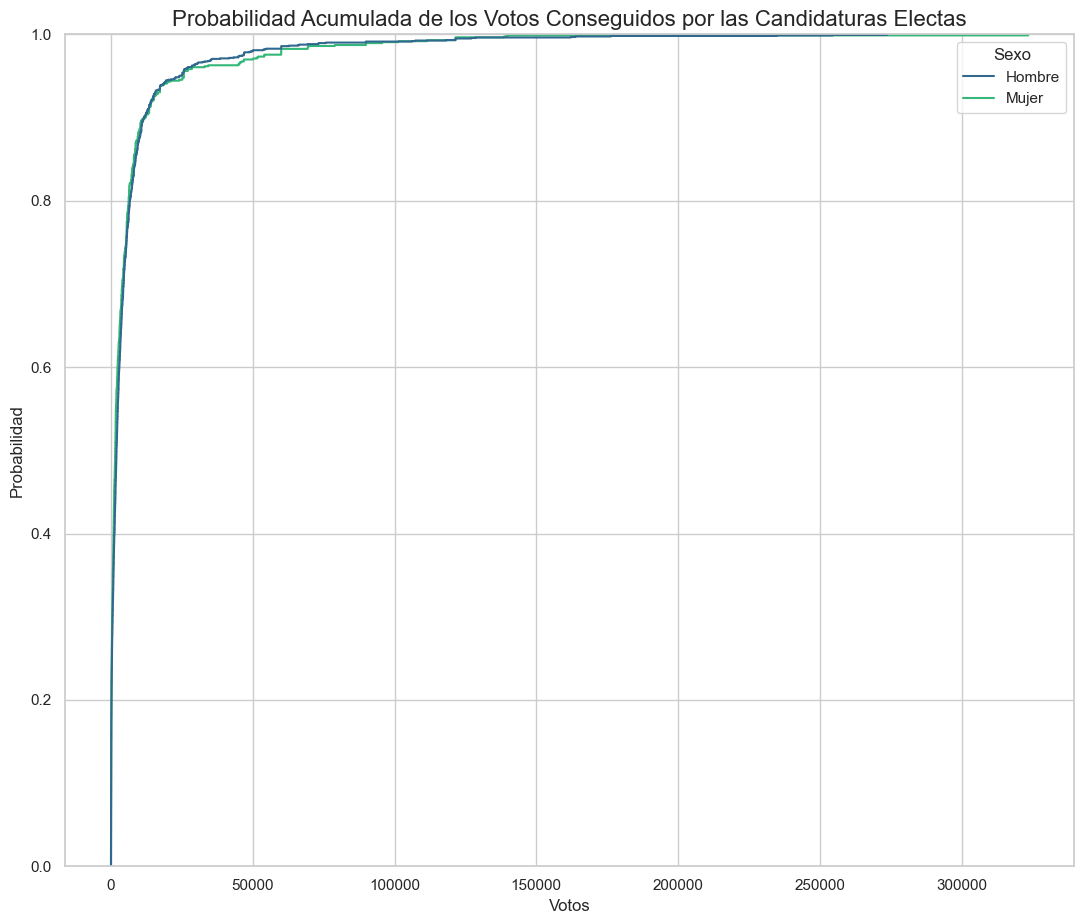

In [87]:
(
    union
    .pipe(
        lambda df: sns.ecdfplot(
            data = df[df['Votos_ganador'] > 0],
            x = 'Votos',
            hue = 'Sexo',
            palette= 'viridis'
        )
    )
)

plt.title('Probabilidad Acumulada de los Votos Conseguidos por las Candidaturas Electas', size = 16)
plt.xlabel('Votos')
plt.ylabel('Probabilidad')
plt.tight_layout()
plt.show()

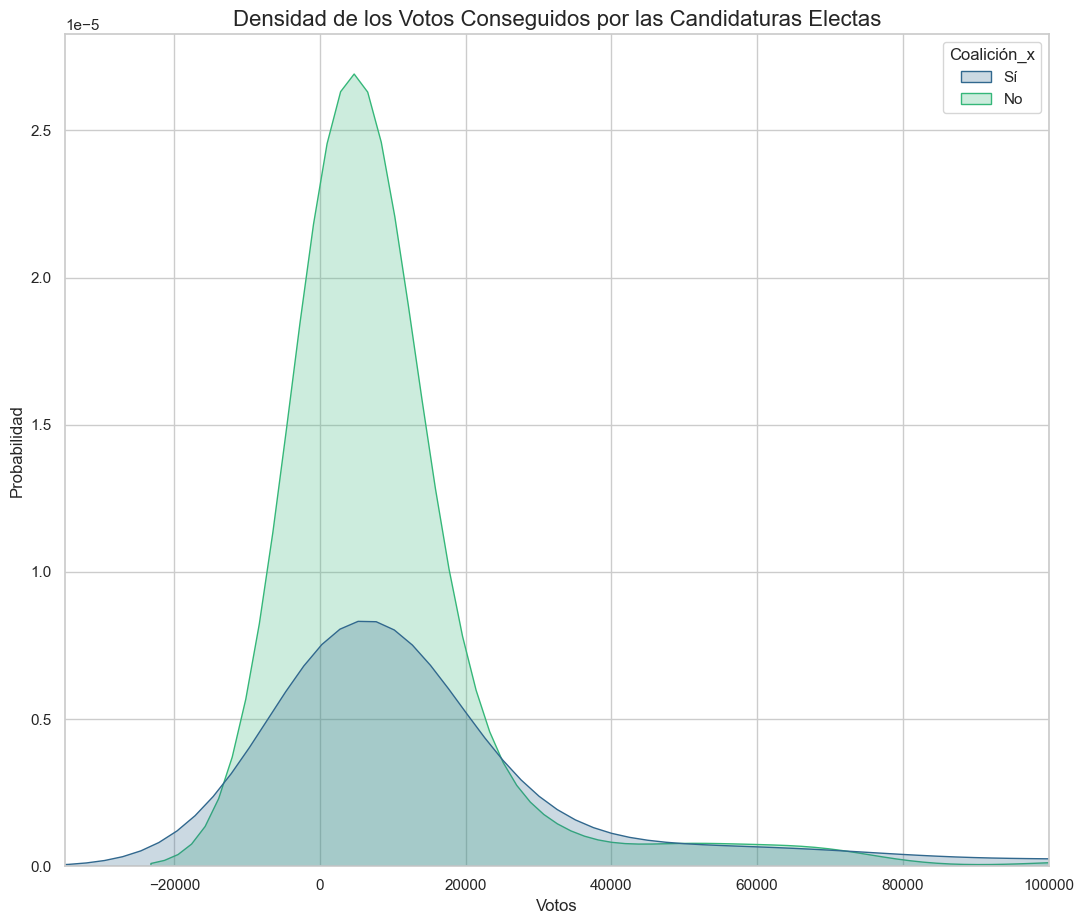

In [88]:
(
    union
    .pipe(
        lambda df: sns.kdeplot(
            data = df[df['Votos_ganador'] > 0],
            x = 'Votos_ganador',
            hue = 'Coalición_x',
            palette= 'viridis',
            bw_method= 0.3,
            fill = True
        )
    )
)

plt.title('Densidad de los Votos Conseguidos por las Candidaturas Electas', size = 16)
plt.xlabel('Votos')
plt.xlim(-35000, 100000)
plt.ylabel('Probabilidad')
plt.tight_layout()
plt.show()

In [89]:
Votos_empirical = empiricaldist.Pmf.from_seq(
    union.Votos
)
Votos_empirical

,probs
Votos,
1.0,0.001202
2.0,0.003206
3.0,0.002405
4.0,0.000802
5.0,0.001202
...,...
176245.0,0.000401
234714.0,0.000401
254541.0,0.000401


In [90]:
pmf_df = pd.DataFrame({'votos': Votos_empirical.index, 'probs': Votos_empirical.values})

pmf_df_sorted = pmf_df.sort_values(by='probs', ascending=False)

pmf_df_sorted

,votos,probs
1128,6252.0,0.004810
58,60.0,0.004810
13,14.0,0.004810
1288,10717.0,0.004409
1391,25699.0,0.004409
...,...,...
733,2307.0,0.000401
734,2310.0,0.000401
735,2321.0,0.000401
224,293.0,0.000401


## Graficamos los Resultados de la Segunda Unión:

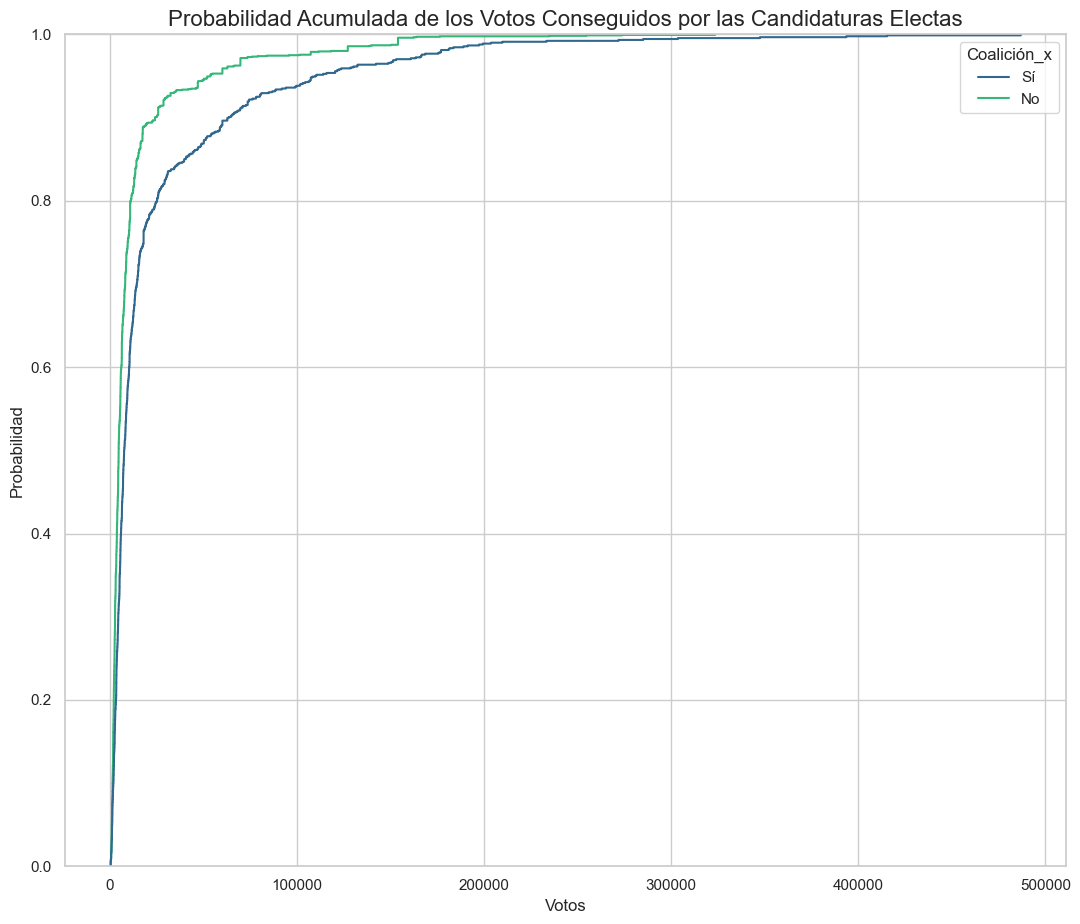

In [91]:
(
    union_1
    .pipe(
        lambda df: sns.ecdfplot(
            data = df[df['Votos_ganador'] > 0],
            x = 'Votos_ganador',
            hue = 'Coalición_x',
            palette= 'viridis'
        )
    )
)

plt.title('Probabilidad Acumulada de los Votos Conseguidos por las Candidaturas Electas', size = 16)
plt.xlabel('Votos')
plt.ylabel('Probabilidad')
plt.tight_layout()
plt.show()

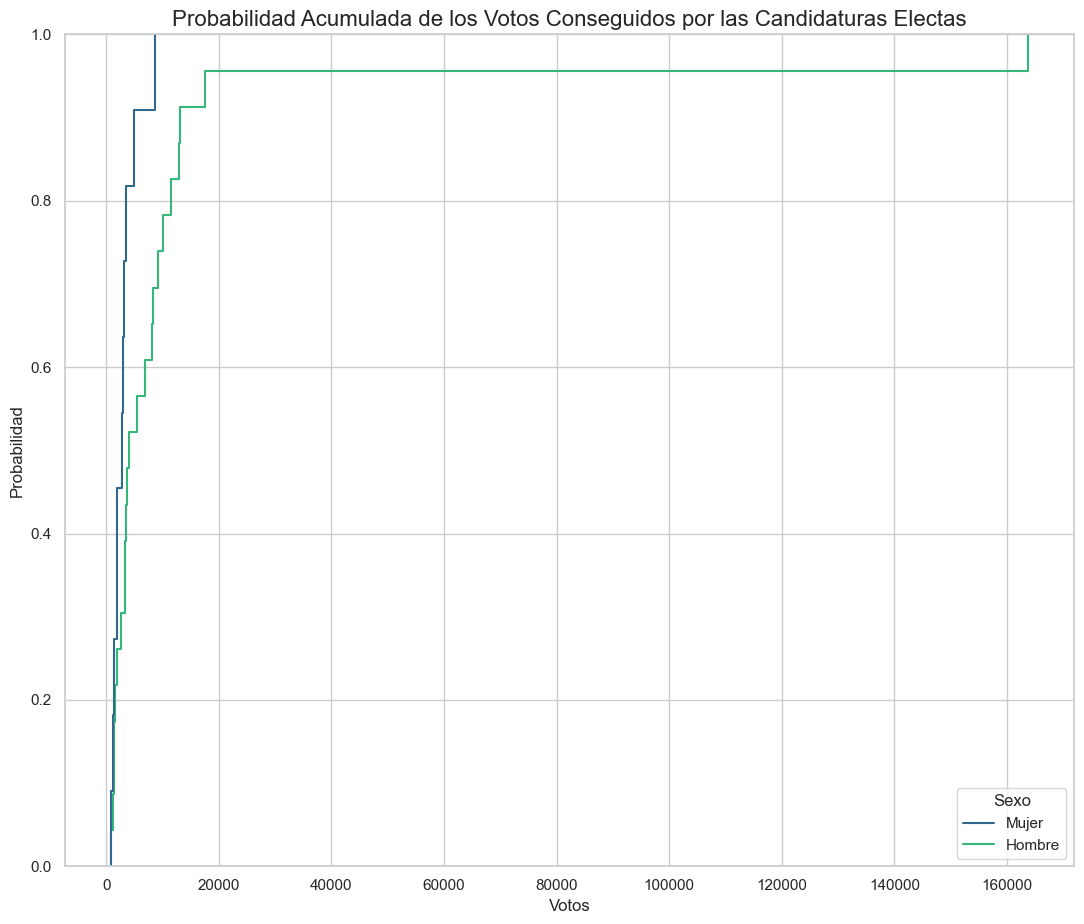

In [92]:
(
    union_1
    .pipe(
        lambda df: sns.ecdfplot(
            data = df[df['Nombre_estado'] == 'YUCATAN'],
            x = 'Votos_ganador',
            hue = 'Sexo',
            palette= 'viridis'
        )
    )
)

plt.title('Probabilidad Acumulada de los Votos Conseguidos por las Candidaturas Electas', size = 16)
plt.xlabel('Votos')
plt.ylabel('Probabilidad')
plt.tight_layout()
plt.show()

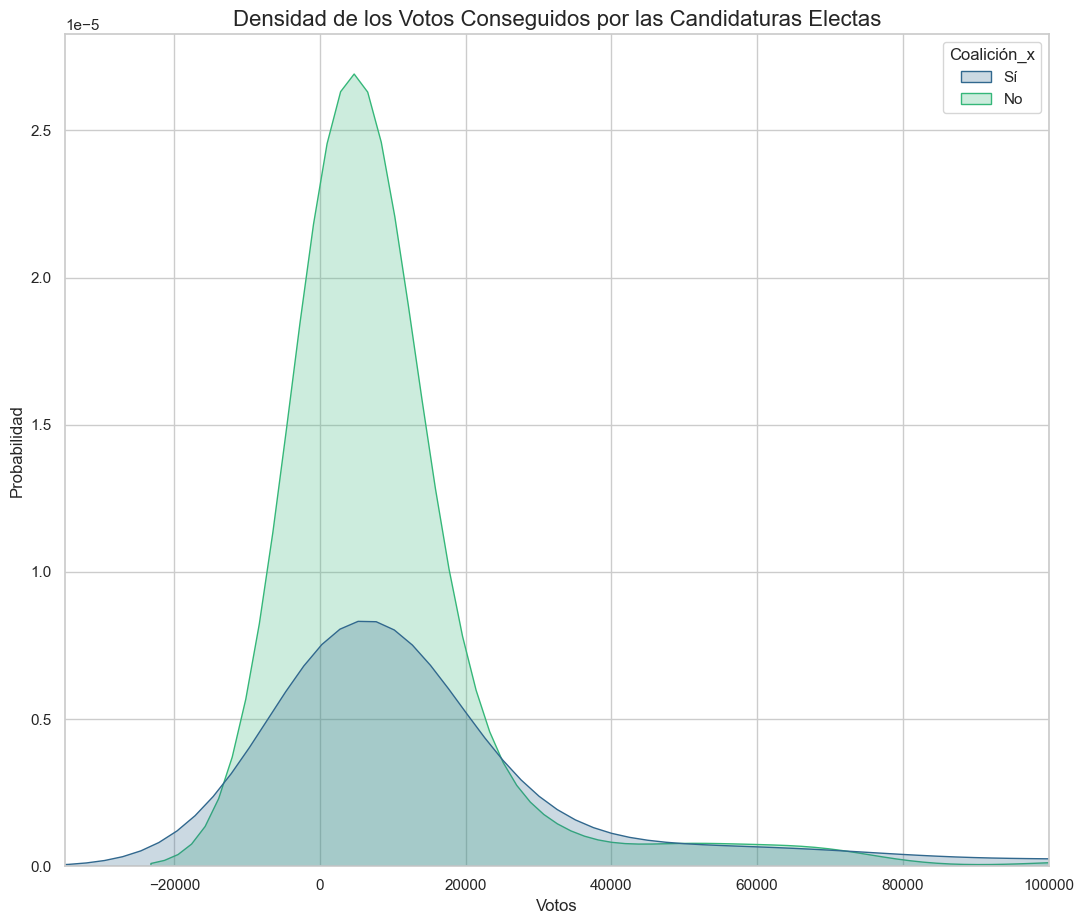

In [93]:
(
    union
    .pipe(
        lambda df: sns.kdeplot(
            data = df[df['Votos_ganador'] > 0],
            x = 'Votos_ganador',
            hue = 'Coalición_x',
            palette= 'viridis',
            bw_method= 0.3,
            fill = True
        )
    )
)

plt.title('Densidad de los Votos Conseguidos por las Candidaturas Electas', size = 16)
plt.xlabel('Votos')
plt.xlim(-35000, 100000)
plt.ylabel('Probabilidad')
plt.tight_layout()
plt.show()

## Seccionamos por Sexo los Conjuntos de Datos:

### Hombres:

In [94]:
Hombres = datos[datos['Sexo'] == 'Hombre']
Hombres.head(5)

,Año,Nombre_estado,Cargo,ID_Municipio,Municipio,Partido,Nombre_candidato,Sexo,Coalición,Formula
48,2018,BAJA CALIFORNIA SUR,Presidencia Municipal,1,COMONDU,MORENA_ES,JOSE WALTER VALENZUELA ACOSTA,Hombre,Sí,Mayoría relativa
59,2018,BAJA CALIFORNIA SUR,Presidencia Municipal,2,MULEGE,nan,JOSE FELIPE PRADO BAUTISTA,Hombre,No,Mayoría relativa
70,2018,BAJA CALIFORNIA SUR,Presidencia Municipal,3,LA PAZ,MORENA_ES,RUBEN GREGORIO MUÑOZ ALVAREZ,Hombre,Sí,Mayoría relativa
106,2018,CAMPECHE,Presidencia Municipal,1,CAMPECHE,PAN_MC,ELISEO FERNANDEZ MONTUFAR,Hombre,Sí,Mayoría relativa
116,2018,CAMPECHE,Presidencia Municipal,2,CALKINI,PRI_PVEM_NA,ROQUE JACINTO SANCHEZ GOLIB,Hombre,Sí,Mayoría relativa


### Mujeres:

In [95]:
Mujeres = datos[datos['Sexo'] == 'Mujer']
Mujeres.head(5)

,Año,Nombre_estado,Cargo,ID_Municipio,Municipio,Partido,Nombre_candidato,Sexo,Coalición,Formula
85,2018,BAJA CALIFORNIA SUR,Presidencia Municipal,4,LOS CABOS,MORENA_ES,JESUS ARMIDA CASTRO GUZMAN,Mujer,Sí,Mayoría relativa
98,2018,BAJA CALIFORNIA SUR,Presidencia Municipal,5,LORETO,C_COMUN_PAN_PRD_PRS_PHBCS,ARELY ARCE PERALTA,Mujer,Sí,Mayoría relativa
147,2018,CAMPECHE,Presidencia Municipal,6,HOPELCHEN,PRI_PVEM_NA,SANDY ARELI BAAS CAUICH,Mujer,Sí,Mayoría relativa
154,2018,CAMPECHE,Presidencia Municipal,7,PALIZADA,PRI_PVEM_NA,MARITZA DIAZ DOMINGUEZ,Mujer,Sí,Mayoría relativa
161,2018,CAMPECHE,Presidencia Municipal,8,TENABO,MORENA,MARIA DEL CARMEN UC CANUL,Mujer,No,Mayoría relativa


## Transformamos los votos para añadirlo después a 'registros':

In [96]:
presidencias = votos
presidencias

,Año,ID_estado,Nombre_estado,ID_Municipio,Municipio,Partido,Votos,Votos_validos,Votos_candidato_sin_registro,Votos_nulos,Total_de_votos,Lista_nominal,Coalición
0,2015,3,BAJA CALIFORNIA SUR,1,COMONDU,PAN_PRS,12818,29183,13,987,30170,48403,Sí
1,2015,3,BAJA CALIFORNIA SUR,1,COMONDU,PRI_PVEM,10037,29183,13,987,30170,48403,Sí
2,2015,3,BAJA CALIFORNIA SUR,1,COMONDU,PRD_PT_MC,4975,29183,13,987,30170,48403,Sí
3,2015,3,BAJA CALIFORNIA SUR,1,COMONDU,NUAL,351,29183,13,987,30170,48403,No
4,2015,3,BAJA CALIFORNIA SUR,1,COMONDU,MORENA,412,29183,13,987,30170,48403,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43273,2022,10,DURANGO,39,VICENTE GUERRERO,PVEM_MORENA,16,9836,165,330,10331,18209,Sí
43274,2022,10,DURANGO,39,VICENTE GUERRERO,PT_MORENA_RSPD,34,9836,165,330,10331,18209,Sí
43275,2022,10,DURANGO,39,VICENTE GUERRERO,PT_MORENA,121,9836,165,330,10331,18209,Sí
43276,2022,10,DURANGO,39,VICENTE GUERRERO,PT_RSPD,11,9836,165,330,10331,18209,Sí


## Transformamos los Datos Para Reducir el Sesgo en los Datos, añadiendo una variable (ALTERNATIVA):

In [97]:
# Crear la columna de votos ajustados inicialmente igual a 'Votos'
presidencias['Nuevo_Votos'] = presidencias['Votos']

# Iterar solo sobre los registros con '_'
for index, row in presidencias[presidencias['Partido'].str.contains("_", na=False)].iterrows():
    partidos = row['Partido'].split("_")  # Separar los partidos de la coalición

    # Filtrar los votos de los partidos individuales dentro del mismo municipio
    filtro = (
        (presidencias['Año'] == row['Año']) &
        (presidencias['ID_estado'] == row['ID_estado']) &
        (presidencias['Nombre_estado'] == row['Nombre_estado']) &
        (presidencias['ID_Municipio'] == row['ID_Municipio']) &
        (presidencias['Municipio'] == row['Municipio']) &
        (presidencias['Partido'].isin(partidos))
    )

    # Sumar los votos de los partidos involucrados en la coalición dentro del mismo municipio
    total_votos = presidencias.loc[filtro, 'Votos'].sum()

    # Asignar la suma a 'Nuevo_Votos' solo en la fila de la coalición
    presidencias.at[index, 'Nuevo_Votos'] = total_votos

# Mostrar los resultados
print(presidencias[['Año', 'ID_estado', 'ID_Municipio', 'Municipio', 'Partido', 'Votos', 'Nuevo_Votos']])


        Año  ID_estado ID_Municipio         Municipio         Partido  Votos  \
0      2015          3            1           COMONDU         PAN_PRS  12818   
1      2015          3            1           COMONDU        PRI_PVEM  10037   
2      2015          3            1           COMONDU       PRD_PT_MC   4975   
3      2015          3            1           COMONDU            NUAL    351   
4      2015          3            1           COMONDU          MORENA    412   
...     ...        ...          ...               ...             ...    ...   
43273  2022         10           39  VICENTE GUERRERO     PVEM_MORENA     16   
43274  2022         10           39  VICENTE GUERRERO  PT_MORENA_RSPD     34   
43275  2022         10           39  VICENTE GUERRERO       PT_MORENA    121   
43276  2022         10           39  VICENTE GUERRERO         PT_RSPD     11   
43277  2022         10           39  VICENTE GUERRERO     MORENA_RSPD     41   

       Nuevo_Votos  
0                0

In [98]:
presidencias['Nombre_estado'].value_counts()

Nombre_estado
MEXICO                 4994
PUEBLA                 3309
CHIAPAS                2881
OAXACA                 2641
MICHOACAN              2618
JALISCO                2503
VERACRUZ               2194
COAHUILA               1695
GUERRERO               1652
ZACATECAS              1576
SAN LUIS POTOSI        1490
HIDALGO                1469
MORELOS                1387
YUCATAN                1279
CHIHUAHUA              1248
GUANAJUATO             1222
TAMAULIPAS              939
DURANGO                 866
SINALOA                 819
NUEVO LEON              813
TLAXCALA                679
NAYARIT                 618
QUINTANA ROO            605
CIUDAD DE MEXICO        539
TABASCO                 513
SONORA                  433
AGUASCALIENTES          374
QUERETARO               355
Sonora                  330
BAJA CALIFORNIA         316
COLIMA                  314
CAMPECHE                254
QUERÉTARO               244
BAJA CALIFORNIA SUR     109
Name: count, dtype: int64

In [99]:
votos.shape

(43278, 14)

In [100]:
presidencias.shape

(43278, 14)

In [101]:
presidencias[(presidencias['Nombre_estado'] == 'BAJA CALIFORNIA SUR') & (presidencias['Año'] == "2018")]

,Año,ID_estado,Nombre_estado,ID_Municipio,Municipio,Partido,Votos,Votos_validos,Votos_candidato_sin_registro,Votos_nulos,Total_de_votos,Lista_nominal,Coalición,Nuevo_Votos
11164,2018,3,BAJA CALIFORNIA SUR,1,COMONDU,C_COMUN_PAN_PRD_PRS_PHBCS,7434,31435,3,1333,32771,53666,Sí,0
11165,2018,3,BAJA CALIFORNIA SUR,1,COMONDU,PRI,7823,31435,3,1333,32771,53666,No,7823
11166,2018,3,BAJA CALIFORNIA SUR,1,COMONDU,PT,422,31435,3,1333,32771,53666,No,422
11167,2018,3,BAJA CALIFORNIA SUR,1,COMONDU,PVEM,229,31435,3,1333,32771,53666,No,229
11168,2018,3,BAJA CALIFORNIA SUR,1,COMONDU,MC,234,31435,3,1333,32771,53666,No,234
11169,2018,3,BAJA CALIFORNIA SUR,1,COMONDU,MORENA,9624,31435,3,1333,32771,53666,No,9624
11170,2018,3,BAJA CALIFORNIA SUR,1,COMONDU,ES,633,31435,3,1333,32771,53666,No,633
11171,2018,3,BAJA CALIFORNIA SUR,1,COMONDU,BCSC,208,31435,3,1333,32771,53666,No,208
11172,2018,3,BAJA CALIFORNIA SUR,1,COMONDU,MORENA_ES,464,31435,3,1333,32771,53666,Sí,10257
11173,2018,3,BAJA CALIFORNIA SUR,1,COMONDU,Candidatura Independiente,4096,31435,3,1333,32771,53666,No,4096
